## Libraries Required

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

## loading training set

In [ ]:
# Loading the train.csv dataset

data = pd.read_csv("drive/MyDrive/train.csv")

In [ ]:
# Inspecting the database 

data.head()

,id,Date,Store Number,Store Grade,City,State,Item Number,Item Family,Promotion,Perishable,Holiday,Holiday Extent,Holiday Transferred,Quantity
0,66779748,2019-01-05,11,A,New York,New York,1146795,GROCERY,False,0,NaN,NaN,NaN,6.0
1,66784022,2019-01-05,14,B,Los Angeles,California,1146795,GROCERY,False,0,NaN,NaN,NaN,6.0
2,66785409,2019-01-05,15,B,Houston,Texas,1146795,GROCERY,False,0,NaN,NaN,NaN,6.0
3,66791247,2019-01-05,19,B,Philadelphia,Pennsylvania,1146795,GROCERY,False,0,NaN,NaN,NaN,6.0
4,66796208,2019-01-05,22,B,Chicago,Illinois,1146795,GROCERY,False,0,NaN,NaN,NaN,6.0


In [ ]:
# Checking the columns in the train.csv dataset

data.columns

Index(['id', 'Date', 'Store Number', 'Store Grade', 'City', 'State',
       'Item Number', 'Item Family', 'Promotion', 'Perishable', 'Holiday',
       'Holiday Extent', 'Holiday Transferred', 'Quantity'],
      dtype='object')

In [ ]:
# Statistics of the train.csv dataset

data.describe()

,id,Store Number,Item Number,Perishable,Quantity
count,2.411000e+03,2411.000000,2411.0,2411.0,2411.000000
mean,7.815180e+07,27.083783,1146795.0,0.0,6.203650
std,6.503956e+06,13.192087,0.0,0.0,1.830018
min,6.677975e+07,11.000000,1146795.0,0.0,2.000000
25%,7.256662e+07,15.000000,1146795.0,0.0,5.000000
50%,7.824733e+07,22.000000,1146795.0,0.0,6.000000
75%,8.362051e+07,35.000000,1146795.0,0.0,8.000000
max,8.965620e+07,54.000000,1146795.0,0.0,14.000000


In [ ]:
# Removing rows having duplicate values in the 'id' column

data.drop_duplicates(subset = 'id')

,id,Date,Store Number,Store Grade,City,State,Item Number,Item Family,Promotion,Perishable,Holiday,Holiday Extent,Holiday Transferred,Quantity
0,66779748,2019-01-05,11,A,New York,New York,1146795,GROCERY,False,0,NaN,NaN,NaN,6.0
1,66784022,2019-01-05,14,B,Los Angeles,California,1146795,GROCERY,False,0,NaN,NaN,NaN,6.0
2,66785409,2019-01-05,15,B,Houston,Texas,1146795,GROCERY,False,0,NaN,NaN,NaN,6.0
3,66791247,2019-01-05,19,B,Philadelphia,Pennsylvania,1146795,GROCERY,False,0,NaN,NaN,NaN,6.0
4,66796208,2019-01-05,22,B,Chicago,Illinois,1146795,GROCERY,False,0,NaN,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2406,89598432,2019-08-31,22,B,Chicago,Illinois,1146795,GROCERY,False,0,NaN,NaN,NaN,4.0
2407,89614679,2019-08-31,33,B,San Antonio,Texas,1146795,GROCERY,False,0,NaN,NaN,NaN,4.0
2408,89617687,2019-08-31,35,B,San Diego,California,1146795,GROCERY,False,0,NaN,NaN,NaN,4.0
2409,89632466,2019-08-31,43,D,Seattle,Washington,1146795,GROCERY,False,0,NaN,NaN,NaN,4.0


# dealing with empty values

In [ ]:
# counting null values in every row

for i,j in data.iteritems():
  print(i)
  print(data[i].isna().sum())

id
0
Date
0
Store Number
0
Store Grade
0
City
0
State
0
Item Number
0
Item Family
0
Promotion
0
Perishable
0
Holiday
1824
Holiday Extent
1824
Holiday Transferred
1824
Quantity
0


In [ ]:
# analyzing the columns that have null values

print(data['Holiday'].value_counts())
print(data['Holiday Extent'].value_counts())
print(data['Holiday Transferred'].value_counts())

Holiday    587
Name: Holiday, dtype: int64
National    403
Local       165
Regional     19
Name: Holiday Extent, dtype: int64
False    557
True      30
Name: Holiday Transferred, dtype: int64


In [ ]:
# For columns having null values, we replace them with 'N/A' or 'Not Holiday'

values = {"Holiday": 'Not Holiday', "Holiday Extent": 'N/A', "Holiday Transferred": 'N/A'}
data = data.fillna(value = values)

# analyzing columns

In [ ]:
# checking unique values in every columns

for i,j in data.iteritems():
  print("The {} column has {} unique values".format(i,data[i].nunique()))
  # thinking to do one hot encoding or label encoding of string variable

The id column has 2325 unique values
The Date column has 239 unique values
The Store Number column has 10 unique values
The Store Grade column has 4 unique values
The City column has 10 unique values
The State column has 8 unique values
The Item Number column has 1 unique values
The Item Family column has 1 unique values
The Promotion column has 2 unique values
The Perishable column has 1 unique values
The Holiday column has 2 unique values
The Holiday Extent column has 4 unique values
The Holiday Transferred column has 3 unique values
The Quantity column has 12 unique values


the item number, Item family and Perishable column have only one unique value so it is not viable to use this column so we are dropping these columns

In [ ]:
# dropping the unwanted columns

data = data.drop(['Item Number', 'Item Family', 'Perishable'], axis = 1)

In [ ]:
# Creating the 'dayofyear' column, equivalent to days of the week

data['dayofyear'] = pd.to_datetime(data.iloc[:,1]).dt.weekday

In [ ]:
col = ['id', 'Date', 'Store Number', 'City', 'State',
       'Promotion', 'Holiday', 'Holiday Extent', 'Holiday Transferred',
       'dayofyear','Store Grade', 'Quantity']

In [ ]:
# Changing the order of columns in the training dataset to the order given in the 'col' list

data = data.reindex(columns=col)

In [ ]:
le = LabelEncoder()

In [ ]:
# label encoding the data 
data.iloc[:,2:-2] = data.iloc[:,2:-2].apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [ ]:
data.head() 

,id,Date,Store Number,City,State,Promotion,Holiday,Holiday Extent,Holiday Transferred,dayofyear,Store Grade,Quantity
0,66779748,2019-01-05,0,4,4,0,1,1,1,5,A,6.0
1,66784022,2019-01-05,1,3,1,0,1,1,1,5,B,6.0
2,66785409,2019-01-05,2,2,6,0,1,1,1,5,B,6.0
3,66791247,2019-01-05,3,5,5,0,1,1,1,5,B,6.0
4,66796208,2019-01-05,4,1,2,0,1,1,1,5,B,6.0


In [ ]:
# Changing the 4 distinct values in the 'Store Grade' to numbers

data.iloc[:,-2] = data.iloc[:,-2].replace({'A':4, 'B':3, 'C':2, 'D':1})

# Visualizing the data

In [ ]:
# Average sales per day of week

df1 = data.groupby(['dayofyear']).mean()

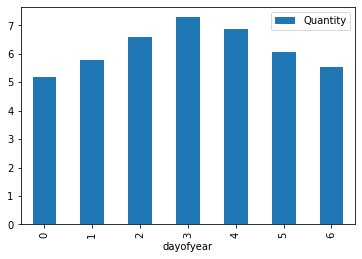

In [ ]:
df1.plot.bar(y= 'Quantity')

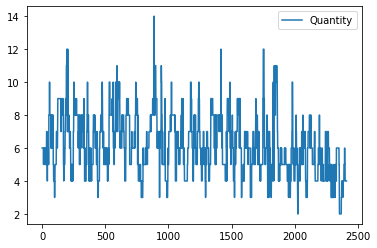

In [ ]:
data.plot(y = 'Quantity')

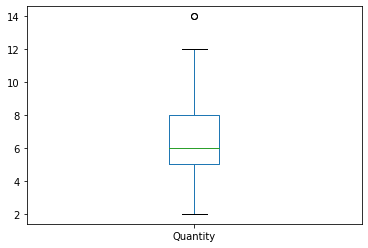

In [ ]:
data.plot(x='id',y='Quantity',kind= 'box')

In [ ]:
#removing outliers

dat = data.loc[data['Quantity']==14]
print(dat)
data.drop(data[data['Quantity'] == 14].index, inplace = True)

           id        Date  Store Number  ...  dayofyear  Store Grade  Quantity
886  75331438  2019-04-04             6  ...          3            3      14.0
887  75348901  2019-04-04             8  ...          3            1      14.0

[2 rows x 12 columns]


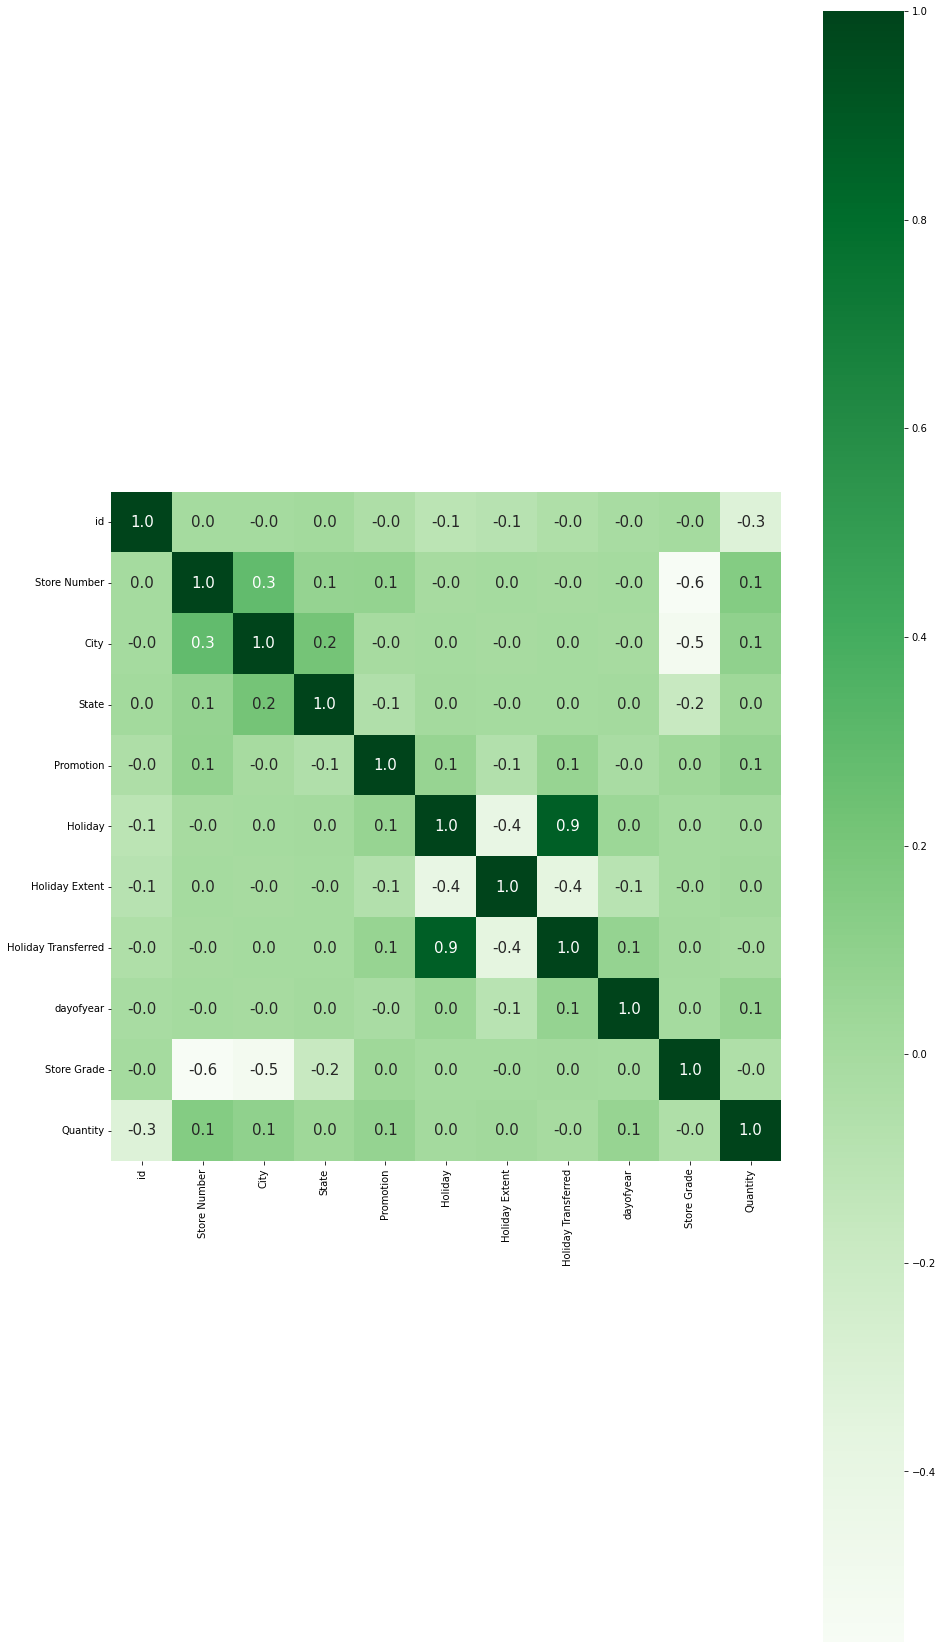

In [ ]:
# Correlation matrix

corr = data.corr()
corr.shape

plt.figure(figsize=(15,30))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [ ]:
cols = ['Store Number', 'City', 'State',
        'Promotion', 'Holiday', 'Holiday Extent', 'Holiday Transferred',
        'dayofyear']

In [ ]:
 # one hot encoding columns having less unique values
 
 df = pd.get_dummies(data, columns=cols)

In [ ]:
df.head()

,id,Date,Store Grade,Quantity,Store Number_0,Store Number_1,Store Number_2,Store Number_3,Store Number_4,Store Number_5,Store Number_6,Store Number_7,Store Number_8,Store Number_9,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,State_0,State_1,State_2,State_3,State_4,State_5,State_6,State_7,Promotion_0,Promotion_1,Holiday_0,Holiday_1,Holiday Extent_0,Holiday Extent_1,Holiday Extent_2,Holiday Extent_3,Holiday Transferred_0,Holiday Transferred_1,Holiday Transferred_2,dayofyear_0,dayofyear_1,dayofyear_2,dayofyear_3,dayofyear_4,dayofyear_5,dayofyear_6
0,66779748,2019-01-05,4,6.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,66784022,2019-01-05,3,6.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,66785409,2019-01-05,3,6.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,66791247,2019-01-05,3,6.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4,66796208,2019-01-05,3,6.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0


# feature selection

In [ ]:
 # check with id too as id has the greatest correlation
 
 df_label = df.iloc[:,3]
 df = df.drop(['id','Quantity','Date'],axis = 1)

In [ ]:
# Recursive feature elimination with cross-validation to select the number of features.

estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=2)
selector = selector.fit(df, df_label)
print("Features selected", selector.support_)
print("Feature ranking", selector.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


Features selected [False False False False False False False  True  True  True False  True
  True  True  True False False False  True False False False False False
 False False False False False  True False False False  True False  True
  True  True False  True  True  True  True  True  True False  True]
Feature ranking [15 26  4  3 12  9 21  1  1  1 14  1  1  1  1 20  5 17  1  7  6 19 28 13
 10 24 16 25 11  1  2 27 18  1 22  1  1  1 23  1  1  1  1  1  1  8  1]


In [ ]:
# feature selection according to k highest scores

selector = SelectKBest(f_regression,k = 20)
print("Original feature shape:", df.shape)

new_X = selector.fit_transform(df, df_label)
print("Transformed feature shape:", new_X.shape)

Original feature shape: (2409, 47)
Transformed feature shape: (2409, 20)


In [ ]:
new_X

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Visualizing the top 20 best features

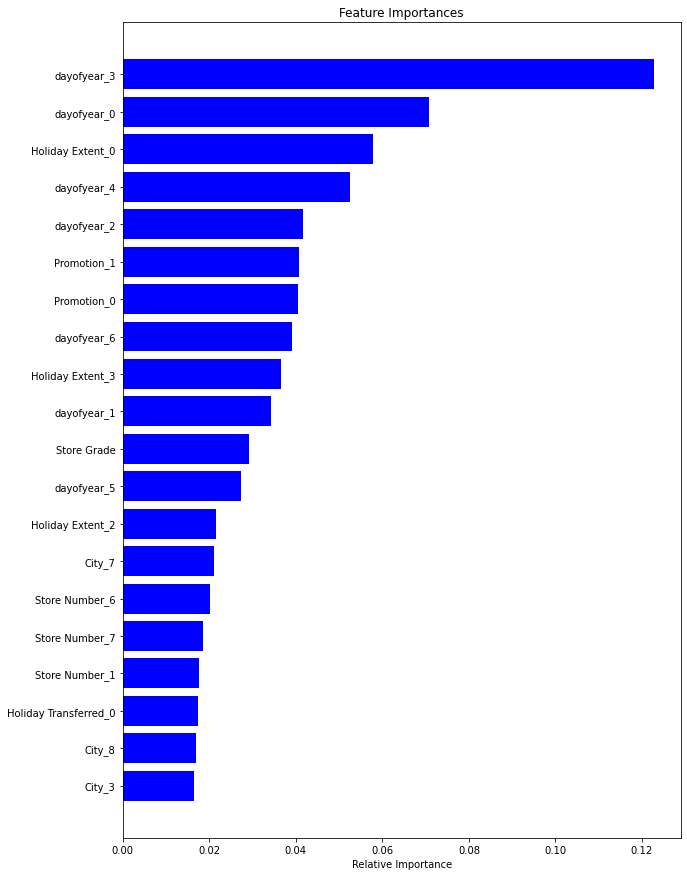

In [ ]:
# Spliiting data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(df, df_label, test_size=0.35, random_state=42)
# fitting the model
model = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
# plotting feature importances
features = df.columns
importances = model.feature_importances_
dict1 = {i : f for (i, f) in zip(importances,features)}
dict2 = sorted(dict1.items(),reverse=True)[:20]
importance = list(a for (a, b) in dict2)
feature = list(b for (a, b) in dict2)
#indices = np.argsort(importances)
plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(dict2)), importance[::-1], color='b', align='center')
plt.yticks(range(len(dict2)), feature[::-1])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# Creating separate lists for top 20 best columns and the columns to be dropped

top20_features = feature
features_list = features.tolist()
features_to_drop = list(set(features_list) - set(top20_features))
print(features_to_drop)
print(len(features_to_drop))

['State_6', 'Holiday_1', 'Holiday Transferred_2', 'City_9', 'Store Number_2', 'City_0', 'Holiday Extent_1', 'State_2', 'Store Number_4', 'Store Number_0', 'City_1', 'City_6', 'Store Number_5', 'State_5', 'Store Number_3', 'State_7', 'State_4', 'City_4', 'State_0', 'City_5', 'Holiday_0', 'City_2', 'Holiday Transferred_1', 'Store Number_8', 'State_3', 'Store Number_9', 'State_1']
27


In [ ]:
features_to_drop

['State_6',
 'Holiday_1',
 'Holiday Transferred_2',
 'City_9',
 'Store Number_2',
 'City_0',
 'Holiday Extent_1',
 'State_2',
 'Store Number_4',
 'Store Number_0',
 'City_1',
 'City_6',
 'Store Number_5',
 'State_5',
 'Store Number_3',
 'State_7',
 'State_4',
 'City_4',
 'State_0',
 'City_5',
 'Holiday_0',
 'City_2',
 'Holiday Transferred_1',
 'Store Number_8',
 'State_3',
 'Store Number_9',
 'State_1']

In [ ]:
df.head()

,Store Grade,Store Number_0,Store Number_1,Store Number_2,Store Number_3,Store Number_4,Store Number_5,Store Number_6,Store Number_7,Store Number_8,Store Number_9,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,State_0,State_1,State_2,State_3,State_4,State_5,State_6,State_7,Promotion_0,Promotion_1,Holiday_0,Holiday_1,Holiday Extent_0,Holiday Extent_1,Holiday Extent_2,Holiday Extent_3,Holiday Transferred_0,Holiday Transferred_1,Holiday Transferred_2,dayofyear_0,dayofyear_1,dayofyear_2,dayofyear_3,dayofyear_4,dayofyear_5,dayofyear_6
0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,3,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4,3,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0


## predicting using the top 20 features

In [ ]:
# Creating a copy of the training dataset with the columns to be dropped removed

df3 = df.drop(features_to_drop,axis = 1)
features_to_drop.remove('Holiday Transferred_2') # as the testing data doesn't have this column

In [ ]:
# #trying pca
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 3)
# df2 = pca.fit_transform(df1)

In [ ]:
## Creating training and test sets from the df3 dataframe (contains 20 columns)

X_train, X_test, y_train, y_test = train_test_split(df3,df_label,test_size = 0.35,random_state=42,shuffle = True)

# machine learning

## linear regression

In [ ]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_prediction = LR.predict(X_test)

In [ ]:
print(mean_absolute_percentage_error(y_test,y_prediction))

0.2450661470942499


## support vector regressor

In [ ]:
SR = SVR(gamma='auto')
SR.fit(X_train,y_train)
y_prediction = SR.predict(X_test)

In [ ]:
print(mean_absolute_percentage_error(y_test,y_prediction))

0.24147979336335046


## Random forest

In [ ]:
RM = RandomForestRegressor(n_estimators=3, criterion='squared_error', max_features='auto', bootstrap=True,
                           oob_score=False, random_state=42)
RM.fit(X_train, y_train)
y_prediction = RM.predict(X_test)

In [ ]:
print(mean_absolute_percentage_error(y_test,y_prediction))

0.25389154674850567


## lasso regression

In [ ]:
clf = linear_model.Lasso(alpha = 0.001)
clf.fit(X_train,y_train)
y_prediction = clf.predict(X_test)

In [ ]:
print(mean_absolute_percentage_error(y_test,y_prediction))

0.24428792935997065


## Ridge regression

In [ ]:
clf = linear_model.Ridge(alpha = 0.1)
clf.fit(X_train,y_train)
y_prediction = clf.predict(X_test)

In [ ]:
print(mean_absolute_percentage_error(y_test,y_prediction))

0.24434118459466725


## Logistic Regression

In [ ]:
clf = linear_model.LogisticRegression(n_jobs=-1, penalty='elasticnet',l1_ratio=0.6, solver='saga',max_iter=800)
clf.fit(X_train, y_train)
y_prediction = clf.predict(X_test)

In [ ]:
y_pred = clf.predict(X_train)
print(mean_absolute_percentage_error(y_train,y_pred)) # training error
print(mean_absolute_percentage_error(y_test,y_prediction)) # testing error

0.23129729517908434
0.2396466783611333


# preprocessing test.csv

In [ ]:
db = pd.read_csv('drive/MyDrive/test.csv')

In [ ]:
db.head()

,id,Date,Store Number,Store Grade,City,State,Item Number,Item Family,Promotion,Perishable,Holiday,Holiday Extent,Holiday Transferred
0,89679192,2019-09-01,11,A,New York,New York,1146795,GROCERY,False,0,NaN,NaN,NaN
1,89683748,2019-09-01,14,B,Los Angeles,California,1146795,GROCERY,False,0,NaN,NaN,NaN
2,89685203,2019-09-01,15,B,Houston,Texas,1146795,GROCERY,False,0,NaN,NaN,NaN
3,89689659,2019-09-01,19,B,Philadelphia,Pennsylvania,1146795,GROCERY,False,0,NaN,NaN,NaN
4,89694936,2019-09-01,22,B,Chicago,Illinois,1146795,GROCERY,False,0,NaN,NaN,NaN


In [ ]:
db.describe()

,id,Store Number,Item Number,Perishable
count,1.124000e+03,1124.000000,1124.0,1124.0
mean,9.568522e+07,27.136121,1146795.0,0.0
std,3.423167e+06,13.572541,0.0,0.0
min,8.967919e+07,11.000000,1146795.0,0.0
25%,9.275832e+07,15.000000,1146795.0,0.0
50%,9.578135e+07,22.000000,1146795.0,0.0
75%,9.857575e+07,35.000000,1146795.0,0.0
max,1.015777e+08,54.000000,1146795.0,0.0


In [ ]:
db.columns

Index(['id', 'Date', 'Store Number', 'Store Grade', 'City', 'State',
       'Item Number', 'Item Family', 'Promotion', 'Perishable', 'Holiday',
       'Holiday Extent', 'Holiday Transferred'],
      dtype='object')

In [ ]:
# counting null values in every row
for i,j in db.iteritems():
  print(i)
  print(db[i].isna().sum())

id
0
Date
0
Store Number
0
Store Grade
0
City
0
State
0
Item Number
0
Item Family
0
Promotion
0
Perishable
0
Holiday
916
Holiday Extent
906
Holiday Transferred
906


In [ ]:
# analyzing the columns that have null values
print(db['Holiday'].value_counts())
print(db['Holiday Extent'].value_counts())
print(db['Holiday Transferred'].value_counts())

Holiday    208
Name: Holiday, dtype: int64
National    114
Local        84
Regional     20
Name: Holiday Extent, dtype: int64
False    218
Name: Holiday Transferred, dtype: int64


In [ ]:
values = {"Holiday": 'Not Holiday', "Holiday Extent": 'N/A', "Holiday Transferred": 'N/A'}
db = db.fillna(value = values)

In [ ]:
#dropping the unwanted columns
data = db.drop(['Item Number', 'Item Family', 'Perishable'], axis = 1)

In [ ]:
db['dayofyear'] = pd.to_datetime(db.iloc[:,1]).dt.weekday

In [ ]:
col_t = ['id', 'Date', 'Store Number', 'City', 'State',
       'Promotion', 'Holiday', 'Holiday Extent', 'Holiday Transferred',
       'dayofyear','Store Grade']

In [ ]:
db = db.reindex(columns=col_t)

In [ ]:
db.head()

,id,Date,Store Number,City,State,Promotion,Holiday,Holiday Extent,Holiday Transferred,dayofyear,Store Grade
0,89679192,2019-09-01,11,New York,New York,False,Not Holiday,N/A,N/A,6,A
1,89683748,2019-09-01,14,Los Angeles,California,False,Not Holiday,N/A,N/A,6,B
2,89685203,2019-09-01,15,Houston,Texas,False,Not Holiday,N/A,N/A,6,B
3,89689659,2019-09-01,19,Philadelphia,Pennsylvania,False,Not Holiday,N/A,N/A,6,B
4,89694936,2019-09-01,22,Chicago,Illinois,False,Not Holiday,N/A,N/A,6,B


In [ ]:
le = LabelEncoder()
# label encoding the data 
db.iloc[:,2:-1] = db.iloc[:,2:-1].apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')
db.iloc[:,-1] = db.iloc[:,-1].replace({'A':4,'B':3,'C':2,'D':1})

In [ ]:
db.head()

,id,Date,Store Number,City,State,Promotion,Holiday,Holiday Extent,Holiday Transferred,dayofyear,Store Grade
0,89679192,2019-09-01,0,4,4,0,1,1,1,6,4
1,89683748,2019-09-01,1,3,1,0,1,1,1,6,3
2,89685203,2019-09-01,2,2,6,0,1,1,1,6,3
3,89689659,2019-09-01,3,5,5,0,1,1,1,6,3
4,89694936,2019-09-01,4,1,2,0,1,1,1,6,3


In [ ]:
cols = ['Store Number',
 'City',
 'State',
 'Promotion',
 'Holiday',
 'Holiday Extent',
 'Holiday Transferred',
 'dayofyear']

In [ ]:
db.head()

,id,Date,Store Number,City,State,Promotion,Holiday,Holiday Extent,Holiday Transferred,dayofyear,Store Grade
0,89679192,2019-09-01,0,4,4,0,1,1,1,6,4
1,89683748,2019-09-01,1,3,1,0,1,1,1,6,3
2,89685203,2019-09-01,2,2,6,0,1,1,1,6,3
3,89689659,2019-09-01,3,5,5,0,1,1,1,6,3
4,89694936,2019-09-01,4,1,2,0,1,1,1,6,3


In [ ]:
# one hot encoding the test columns
db = pd.get_dummies(db, columns=cols)

In [ ]:
# droping the features that are not in top 20 in test dataset
db_t = db.drop(features_to_drop,axis = 1)

In [ ]:
# droping id because it is not relevant with sales and is just a unique way to represent the rows/sales
db_id = db_t['id']
db_t = db_t.drop(['id','Date'],axis = 1)

In [ ]:
df3.columns

Index(['Store Grade', 'Store Number_1', 'Store Number_6', 'Store Number_7',
       'City_3', 'City_7', 'City_8', 'Promotion_0', 'Promotion_1',
       'Holiday Extent_0', 'Holiday Extent_2', 'Holiday Extent_3',
       'Holiday Transferred_0', 'dayofyear_0', 'dayofyear_1', 'dayofyear_2',
       'dayofyear_3', 'dayofyear_4', 'dayofyear_5', 'dayofyear_6'],
      dtype='object')

In [ ]:
db_t.columns

Index(['Store Grade', 'Store Number_1', 'Store Number_6', 'Store Number_7',
       'City_3', 'City_7', 'City_8', 'Promotion_0', 'Promotion_1',
       'Holiday Extent_0', 'Holiday Extent_2', 'Holiday Extent_3',
       'Holiday Transferred_0', 'dayofyear_0', 'dayofyear_1', 'dayofyear_2',
       'dayofyear_3', 'dayofyear_4', 'dayofyear_5', 'dayofyear_6'],
      dtype='object')

# training the model on the model having the best accuracy in training set

In [ ]:
# using the best error model which was logistic regression model
clf = linear_model.LogisticRegression(n_jobs=-1, penalty='elasticnet',l1_ratio=0.6, solver='saga',max_iter=800)
clf.fit(df3, df_label)
y_prediction = clf.predict(db_t)

In [ ]:
# testing for training dataset error
y_pred = clf.predict(df3)
mean_absolute_percentage_error(df_label,y_pred)

0.23484204555188365

In [ ]:
# Converting all datatypes to dataframe
y_prediction = pd.DataFrame(y_prediction)
db_id = pd.DataFrame(db_id)

In [ ]:
# adding the prediction to the id
db_id['Sales'] = y_prediction

In [ ]:
submission_df.head()

,id,Sales
0,89679192,6.0
1,89683748,5.0
2,89685203,6.0
3,89689659,6.0
4,89694936,6.0


In [ ]:
# making submission_df
submission_df = db_id

In [ ]:
#Submission
submission_df.to_csv('submissions.csv',index=False)